# Twitter US Airline Sentiment Analysis


## **Context:**

- A sentiment analysis job about the problems of each major U.S. airline
- Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## **Dataset:**

- The project is from a dataset from Kaggle
- Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
- The dataset has the following columns:
    - tweet_id
    - airline_sentiment
    - airline_sentiment_confidence
    - negativereason
    - negativereason_confidence
    - airline
    - airline_sentiment_gold
    - name
    - negativereason_gold
    - retweet_count
    - text
    - tweet_coord
    - tweet_created
    - tweet_location  
    - user_timezone

Github Link: https://github.com/deepak-padmanabhan/PGP-AIML

In [11]:
%matplotlib inline

In [126]:
# install and import necessary libraries.

!pip install contractions
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import matplotlib.pyplot as plt
import seaborn as sns
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.corpus import wordnet                         # Import wordnet.
from nltk.tokenize import word_tokenize                 # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

from nltk.corpus import stopwords
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dpadmanabhan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dpadmanabhan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dpadmanabhan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [249]:
# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

In [322]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [323]:
data.shape                                               # print shape of data.

(14640, 15)

There are 14640 rows and 15 columns in the dataset

In [324]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [325]:
print("Number of words in the dataset:",data['text'].apply(lambda x: len(x.split(' '))).sum())

Number of words in the dataset: 260526


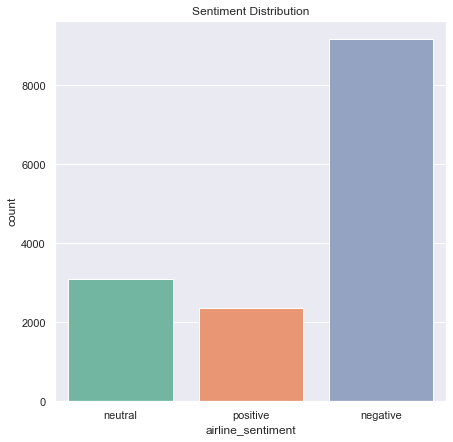

In [326]:
#Plot the distribution of sentiments across the dataset 
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(x=data["airline_sentiment"],palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

- Majority of the airline tweets have a negative sentiment

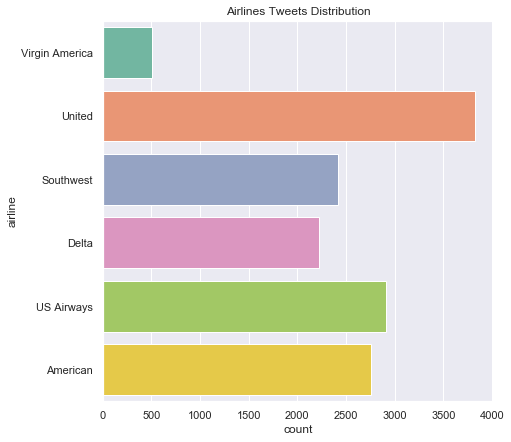

In [327]:
#Plot the distributon of tweets across airlines
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(y=data["airline"],palette="Set2")
plt.title("Airlines Tweets Distribution")
plt.show()

- United has the maximum number of tweets followed by US Airways and American
- Virgin America has the least number of tweets

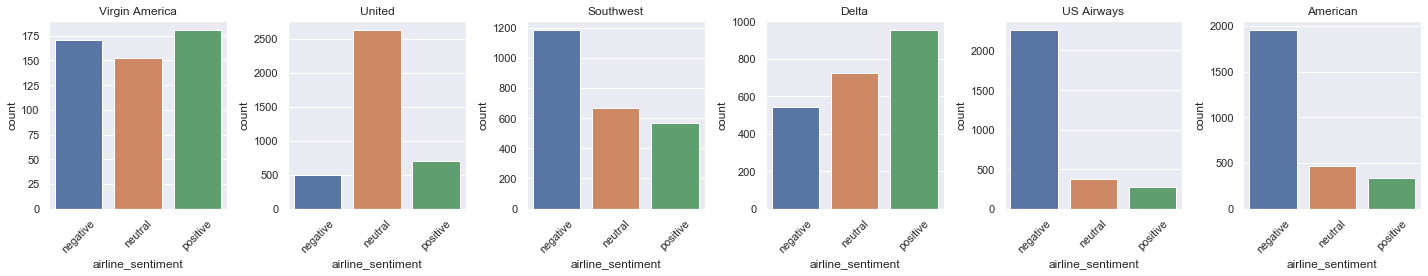

In [328]:
#Plotting the distribution of sentiments for each airline
j=1
plt.subplots(figsize=(20,4),tight_layout=True)
for i in data["airline"].unique():
        x = data[data["airline"]==i]
        Index = [0,1,2]
        plt.subplot(1, 6, j)
        sns.countplot(x["airline_sentiment"])
        plt.xticks(Index,['negative','neutral','positive'],rotation=45)
        plt.title(i)
        j +=1
plt.show()

- US Airways has the maximum number of negative sentiment tweets followed by American and Southwest 
- United has the least number of negative sentiment tweets 
- Delta has the maximum number of positive tweets 
- US Airways has the least number of positive tweets 

Text(0, 0.5, 'No. of Tweets')

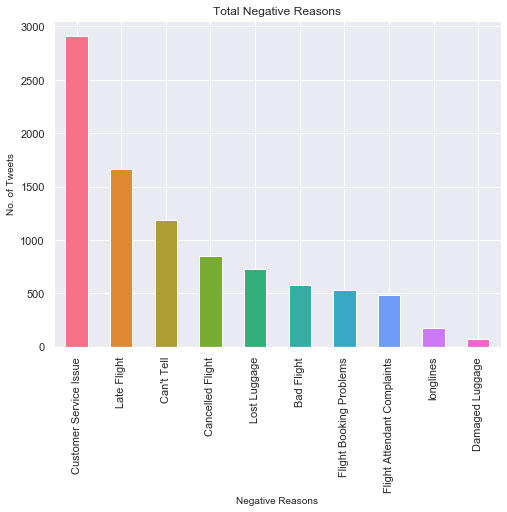

In [329]:
#Plotting the distribution of all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(data["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

- Customer Service, Late Flight, Can't Tell and Cancelled Flight are the top 4 negative reasons in the dataset

In [330]:
NR_Count=dict(data['negativereason'].value_counts(sort=False))

In [331]:
NR_Count

{'Damaged Luggage': 74,
 'Cancelled Flight': 847,
 'Late Flight': 1665,
 'longlines': 178,
 'Bad Flight': 580,
 'Lost Luggage': 724,
 'Flight Attendant Complaints': 481,
 'Customer Service Issue': 2910,
 'Flight Booking Problems': 529,
 "Can't Tell": 1190}

In [332]:
def NR_Count(Airline):
    if Airline=='All':
        df=data
    else:
        df=data[data['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [333]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,color=color)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

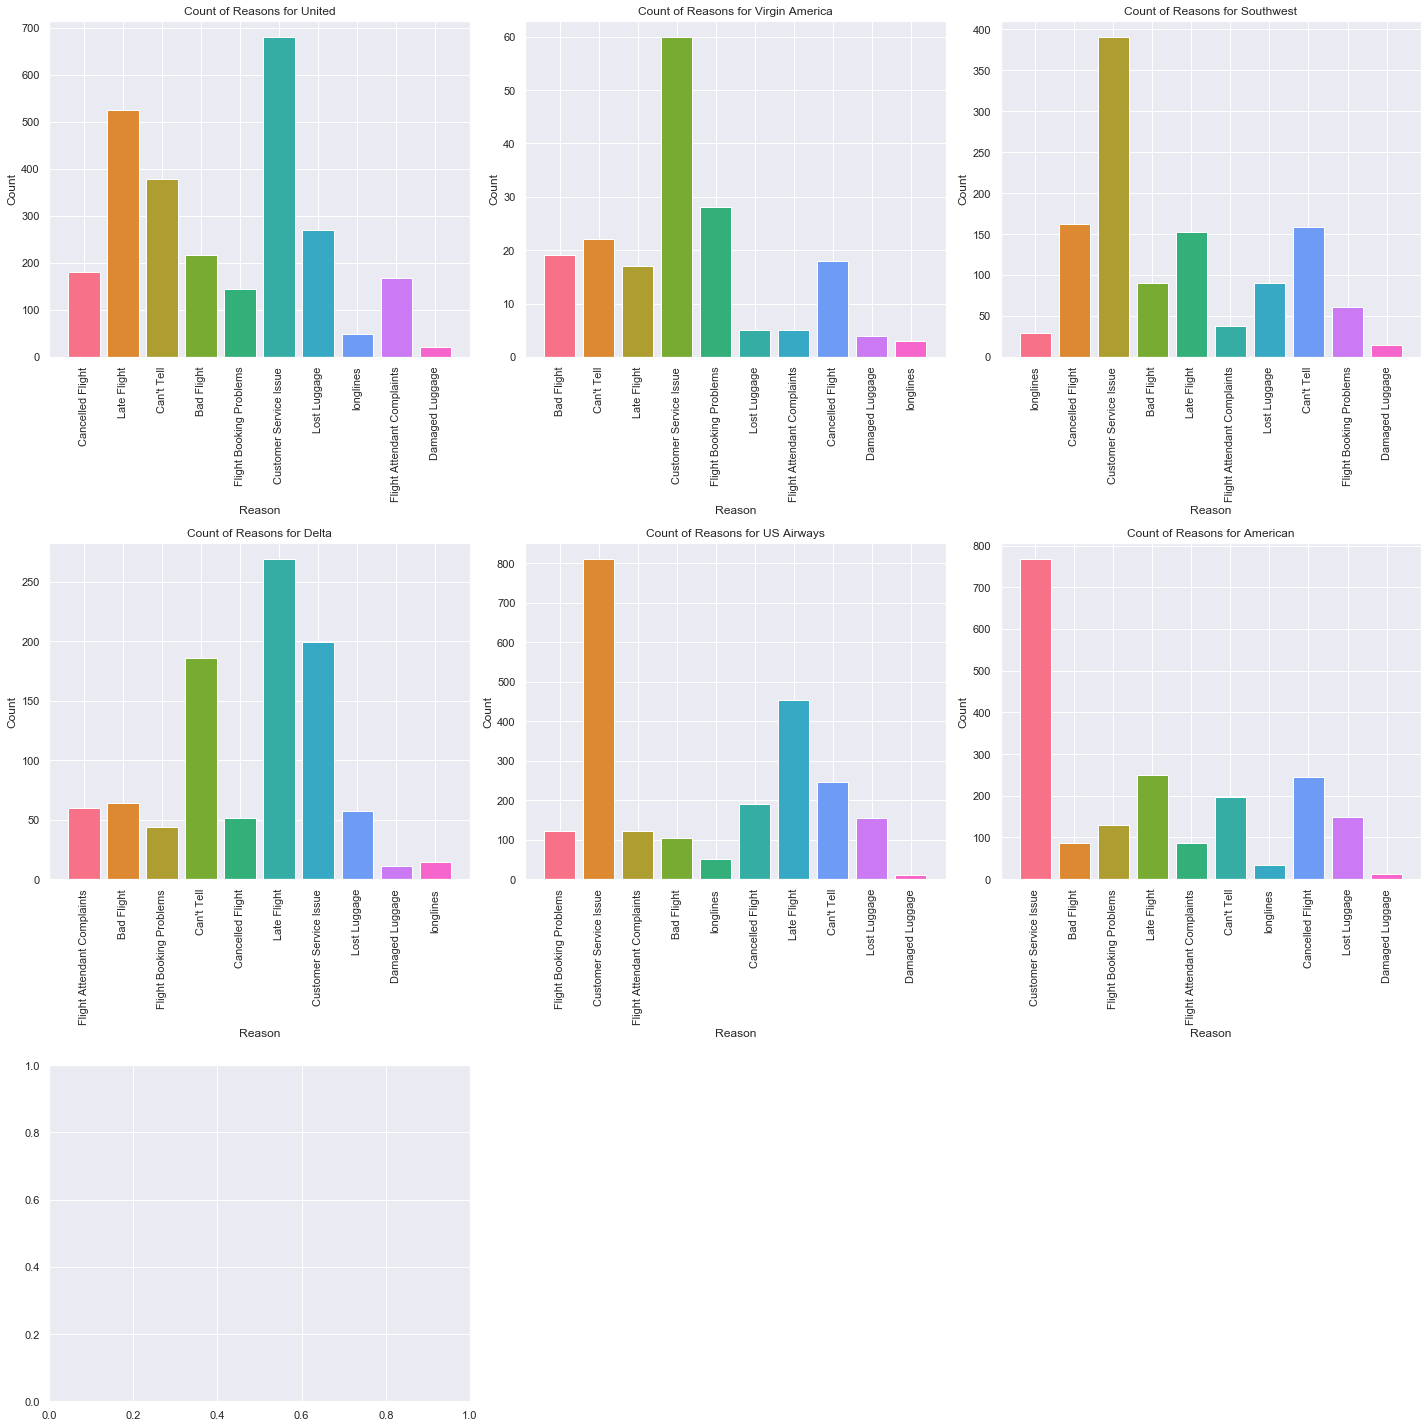

In [334]:
#Plotting the distribution of negative reasons for each airline
j=1
airline = ['All','United', 'Virgin America', 'Southwest', 'Delta', 'US Airways','American']
plt.subplots(figsize=(20,20),tight_layout=True)
for i in airline:
        plot_reason(i)
        plt.subplot(3, 3, j)
        j +=1
plt.show()

- Customer Service is the top negative reason for all airlines except Delta 
- Late Flight is the top negative reason for Delta 

In [335]:
#visualization using wordcloud for the negative tweets
df=data[data['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [336]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

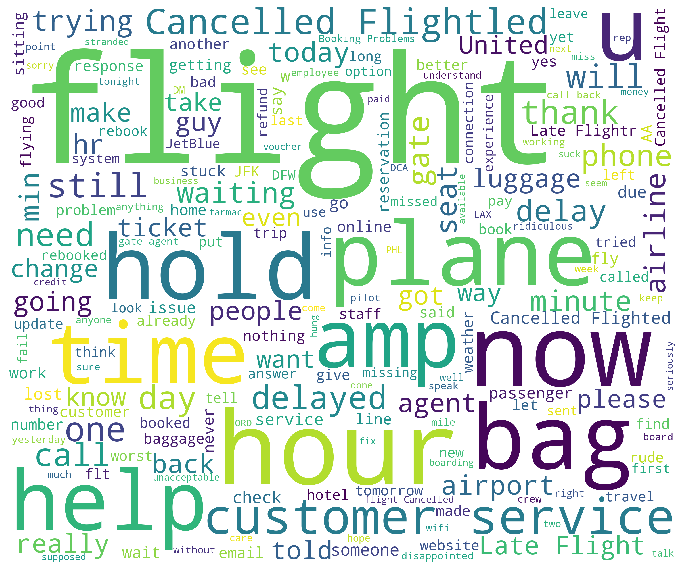

In [337]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [338]:
#visualization using wordcloud for the positive tweets
df=[]
df=data[data['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [339]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

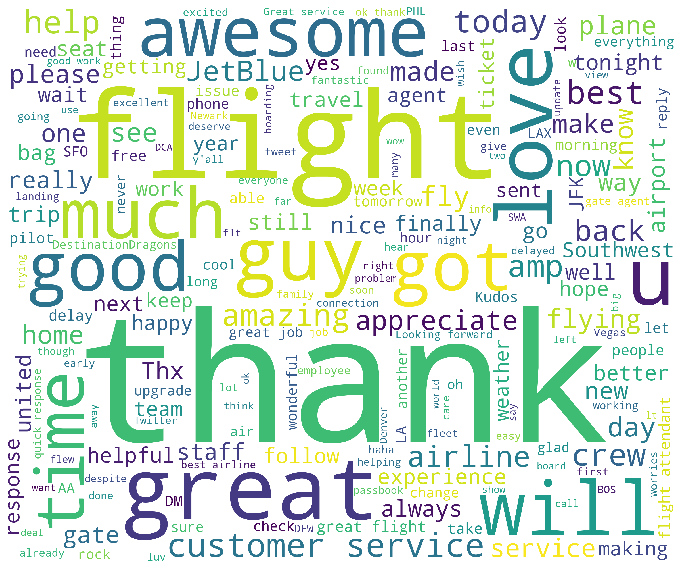

In [340]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [341]:
#visualization using wordcloud for the neutral tweets
df=[]
df=data[data['airline_sentiment']=='neutral']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [342]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

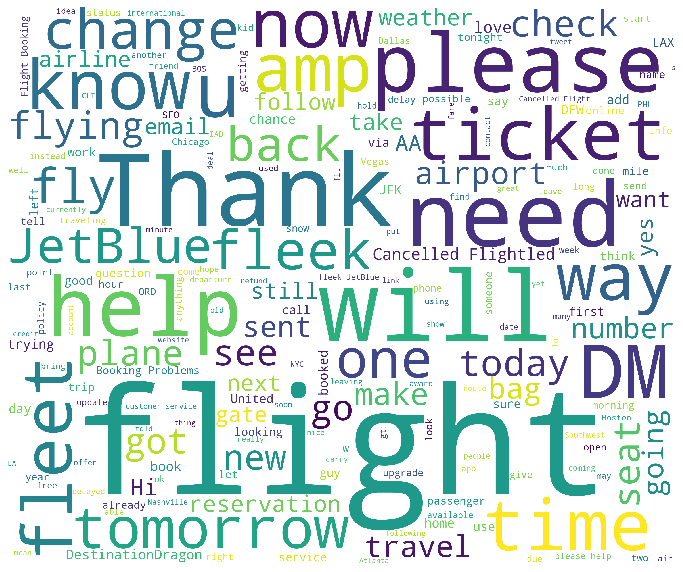

In [343]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Understanding of Data Columns

In [344]:
#Dropping all other columns except “text” and “airline_sentiment”.
data = data.loc[:, ['text', 'airline_sentiment']]

In [345]:
data.isnull().sum(axis=0)                                # Check for NULL values.

text                 0
airline_sentiment    0
dtype: int64

In [346]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [347]:
data.shape                                # Shape of data

(14640, 2)

### Data Pre-processing:

- Remove html tags.
- Remove http links 
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers
- Removal of special characters and punctuations 
- Conversion to lowercase 
- Tokenization
- To remove Stopwords.
- Lemmatized data
- Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)

In [348]:
data[data['text'].str.contains('http')].head()

,text,airline_sentiment
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",neutral
13,@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn,positive
21,@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA,positive
34,@VirginAmerica this is great news! America could start flights to Hawaii by end of year http://t.co/r8p2Zy3fe4 via @Pacificbiznews,positive
35,Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP,neutral


In [349]:
#Remove html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head(11)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",positive


In [350]:
# Removal of the http link using Regular Expression.
for i, row in data.iterrows():
    clean_text = re.sub(r"http\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text
data.head(10)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there.",neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",positive


In [351]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head(11)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away :)",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there.",neutral
8,"@virginamerica Well, I did not…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. you are too good to me.",positive


In [352]:
def remove_nonalphabets(text):
    text = re.sub("[^a-zA-Z]"," ", text)
    return text

data['text'] = data['text'].apply(lambda x: remove_nonalphabets(x))
data.head(10)

,text,airline_sentiment
0,VirginAmerica What dhepburn said,neutral
1,VirginAmerica plus you have added commercials to the experience tacky,positive
2,VirginAmerica I did not today Must mean I need to take another trip,neutral
3,VirginAmerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse,negative
4,VirginAmerica and it is a really big bad thing about it,negative
5,VirginAmerica seriously would pay a flight for seats that did not have this playing it is really the only bad thing about flying VA,negative
6,VirginAmerica yes nearly every time I fly VX this ear worm will not go away,positive
7,VirginAmerica Really missed a prime opportunity for Men Without Hats parody there,neutral
8,virginamerica Well I did not but NOW I DO D,positive
9,VirginAmerica it was amazing and arrived an hour early you are too good to me,positive


In [353]:
# Check numbers in text
data[data['text'].str.contains('\d+')].head()

,text,airline_sentiment


In [354]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head(10)

,text,airline_sentiment
0,VirginAmerica What dhepburn said,neutral
1,VirginAmerica plus you have added commercials to the experience tacky,positive
2,VirginAmerica I did not today Must mean I need to take another trip,neutral
3,VirginAmerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse,negative
4,VirginAmerica and it is a really big bad thing about it,negative
5,VirginAmerica seriously would pay a flight for seats that did not have this playing it is really the only bad thing about flying VA,negative
6,VirginAmerica yes nearly every time I fly VX this ear worm will not go away,positive
7,VirginAmerica Really missed a prime opportunity for Men Without Hats parody there,neutral
8,virginamerica Well I did not but NOW I DO D,positive
9,VirginAmerica it was amazing and arrived an hour early you are too good to me,positive


In [355]:
# Tokenization of data
data['text'] = data.apply(lambda row: word_tokenize(row['text']), axis=1)      

In [356]:
data.head(10)                                                                    # Look at how tokenized data looks.

,text,airline_sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",neutral
3,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative
5,"[VirginAmerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, VA]",negative
6,"[VirginAmerica, yes, nearly, every, time, I, fly, VX, this, ear, worm, will, not, go, away]",positive
7,"[VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, there]",neutral
8,"[virginamerica, Well, I, did, not, but, NOW, I, DO, D]",positive
9,"[VirginAmerica, it, was, amazing, and, arrived, an, hour, early, you, are, too, good, to, me]",positive


In [357]:
stop_words = stopwords.words('english')

customlist = ['not']

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stop_words = list(set(stop_words) - set(customlist))                              

In [358]:
sorted(stop_words)

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's'

In [359]:
%%time
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    lemmatizer = WordNetLemmatizer()
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos = 'v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head(10)

Wall time: 2.85 s


,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative
5,virginamerica seriously would pay flight seat not play really bad thing fly va,negative
6,virginamerica yes nearly every time fly vx ear worm not go away,positive
7,virginamerica really miss prime opportunity men without hat parody,neutral
8,virginamerica well not,positive
9,virginamerica amaze arrive hour early good,positive


In [360]:
print("Total number of words after data pre-processing:",data['text'].apply(lambda x: len(x.split(' '))).sum())

Total number of words after data pre-processing: 146219


In [361]:
#label Encoding the target airline_sentiment column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["airline_sentiment"] = encoder.fit_transform(data["airline_sentiment"])
print(encoder.classes_)
data.head()

['negative' 'neutral' 'positive']


,text,airline_sentiment
0,virginamerica dhepburn say,1
1,virginamerica plus add commercials experience tacky,2
2,virginamerica not today must mean need take another trip,1
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,0
4,virginamerica really big bad thing,0


Vectorization using CountVectorizer

In [362]:
# Vectorization (Convert text data to numbers).
vectorizer = CountVectorizer(analyzer="word")                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features_df = pd.DataFrame(data = data_features.toarray() , 
                                columns = vectorizer.get_feature_names())     

data_features_df.head()

,aa,aaaand,aaadvantage,aaalwayslate,aacustomerservice,aadavantage,aadelay,aadv,aadvantage,aafail,aal,aaron,aarp,aateam,ab,aback,abandon,abandonment,abassinet,abbreve,abc,abcletjetbluestreamfeed,abcnetwork,abcnews,abduct,abi,abigailedge,abilities,ability,able,aboard,aboout,abound,abq,abroad,absolute,absolutely,absorb,absorber,absoulutely,absurd,absurdity,absurdly,abt,abundance,abuse,abysmal,ac,acarl,acc,accelerate,accept,acceptable,acces,access,accessibility,accessible,accident,accidentally,accidents,accomidating,accommodate,accommodation,accommodations,accompaniments,accompany,accomplish,accord,accordingly,account,accountability,accountable,accrue,acct,accts,accumulation,accurate,accurately,accuratetraveltimes,accuse,achieve,ack,acknowledge,acknowledgement,acknowledgment,acnewsguy,acosta,acoustic,acpt,acquire,acquisition,across,act,actingoutmgmnt,action,activate,active,actively,activities,activity,actual,actually,actualy,acu,acy,ad,ada,adam,adams,adapt,add,addair,addition,additional,additionally,additonal,addr,address,addtl,adjacent,adjust,adjustment,adjustments,admin,admiral,admirals,admiralsclub,admit,adolfo,adopt,adore,adress,ads,adult,adv,advan,advance,advantage,adventure,advertise,advice,advis,advise,advisories,advisory,advsry,aegeanairlines,aerocivilcol,aerojobmarket,aeroport,aesthetics,aex,af,affairs,affect,affiliate,afford,affordable,afiliates,aflame,aforementioned,afraid,african,aft,afterall,afternoon,afterward,aftr,agcommunity,age,agencies,agency,agent,agents,aggiemensgolf,aggravate,aggravation,aggressive,agian,agnt,ago,agoodlife,agree,agreement,agt,agts,ah,aha,ahah,ahead,ahem,ahhhh,ahhhhh,ahold,ahoy,aiecraft,aif,ail,aim,air,airborne,airbus,airbusintheus,aircanada,aircargo,aircraft,aircrafts,aircrft,airfare,airfares,airfarewatchdog,airline,airlineadviser,airlinegave,airlinegeeks,airlineguys,airlinequality,airliner,airlines,airlinesecurity,airnzusa,airplane,airplanemodewason,airplanes,airport,airportcardio,airports,airpt,airserv,airside,airsouthwest,airspace,airstairs,airtahitinui,airtran,airway,airways,ais,aisle,aisles,aka,akron,al,alabama,alamo,alan,alarm,alas,alaska,alaskaair,...,wilmington,wilson,win,wind,windchill,window,windows,windy,wine,wing,wink,winkwink,winner,winners,winnipeg,winston,winter,winterops,winterstorm,winterweather,winwin,wipe,wire,wireless,wise,wiser,wish,wishmyflightwaslonger,wit,withhold,within,without,witness,witty,wiyh,wjere,wk,wknd,wkrb,wks,wlcm,wld,wmass,wmcactionnews,wmn,wn,wo,woase,woaw,woeful,woman,women,wonder,wonderful,wonderfully,wong,wonked,wontflyagainwithyou,woo,woodland,woody,woof,woohoo,word,work,workaround,worker,workers,workforce,workforces,workhard,workin,workng,workout,worksnicely,world,worlds,worldwide,worm,worrisome,worry,worse,worst,worstairline,worstairlineever,worstairlineinamerica,worstcustomerservice,worstcustomerserviceever,worstcustservice,worstever,worstflight,worstflightever,worstflightexperienceever,worstservice,worstthingever,worsttraveldayever,worsttripofmylife,worth,worthless,worthy,would,wouldt,wound,wow,wpg,wrap,wrath,wreck,wrench,wrestle,wretched,write,writers,wrong,wronganswer,wrongfully,wrongiswrong,ws,wsj,wsjplus,wtf,wtfodds,wth,wtop,wtvd,wtw,wudda,wut,wway,wx,wylie,wyoming,xd,xdaily,xfinity,xjared,xklrog,xld,xm,xmas,xna,xox,xoxo,xt,xtra,xvm,xw,xweekly,xx,xxx,xzmscw,ya,yaayy,yaffasolin,yards,yasss,yasssss,yay,yayayay,yb,yday,yea,yeah,year,yearly,years,yearslate,yeehaw,yeg,yell,yellow,yeniettelswood,yep,yer,yes,yeseniahernandez,yessir,yest,yesterday,yet,yhz,yield,yikes,yo,yoga,yogurt,york,yorkshire,youareonyourown,youcandobetter,youcouldntmakethis,youdidit,youknowyouwantto,young,younger,youragentshavenoclue,yourairlinesucks,youredoingitwrong,youretheworst,yourlocalnyer,yourock,yourphonesystemsucks,yourstoryhere,yousuck,yout,youth,yow,yponthebeat,ypu,yr,yrs,ystday,ystrdy,yuck,yucki,yul,yuma,yummy,yup,yvonne,yvonneokaka,yvr,yw,ywg,yxe,yxu,yyc,yyj,yyz,yyzua,zabsonre,zacks,zagging,zakkohane,zambia,zcc,zero,zfv,zig,zip,zipper,zj,zkatcher,zombie,zone,zoom,zrh,z

In [365]:
# Print total number of vocabulary words
print(len(vectorizer.vocabulary_))

10040


In [366]:
freq = pd.DataFrame({'Feature_Name': vectorizer.get_feature_names(),
                     'Count': np.asarray(data_features.sum(axis = 0))[0]}).sort_values('Count', ascending = False)

freq

,Feature_Name,Count
3276,flight,4879
9261,unite,4168
6105,not,3911
9383,usairways,3053
336,americanair,2964
...,...,...
2866,epicfailure,1
2867,epipens,1
2868,epitimeoffail,1
2869,eps,1


In [367]:
data_features_df.shape

(14640, 10040)

In [368]:
labels = data['airline_sentiment']
labels = labels.astype('int')

In [369]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(data_features_df, labels, test_size=0.3, random_state=42)

In [370]:
# Using Random Forest to build model for the classification of reviews.
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

In [371]:
# Predict the result for test data using the model built above.
result = forest.predict(X_test)

In [372]:
#Accuracy of the Random Forest CountVectorizer model 
forest.score(X_test, y_test)

0.7486338797814208

In [373]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, classification_report
print(classification_report(y_test, result, labels=[2,1,0]))

              precision    recall  f1-score   support

           2       0.73      0.52      0.61       694
           1       0.54      0.46      0.50       884
           0       0.80      0.90      0.85      2814

    accuracy                           0.75      4392
   macro avg       0.69      0.63      0.65      4392
weighted avg       0.74      0.75      0.74      4392



Text(66.5, 0.5, 'Actual')

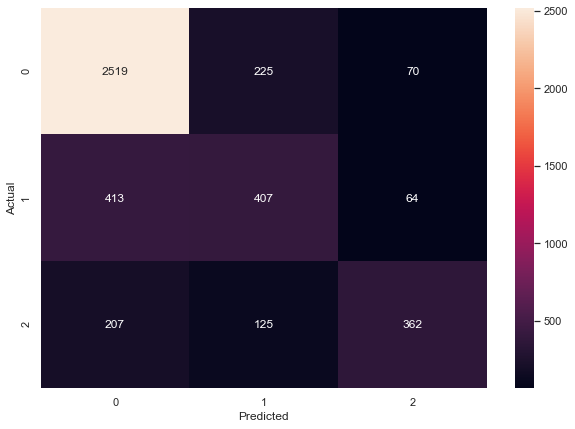

In [374]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Vectorization using TfidfVectorizer

In [375]:
# Using TfidfVectorizer to convert text data to numbers.

vectorizer = TfidfVectorizer()
data_features = vectorizer.fit_transform(data['text'])

data_features_df = pd.DataFrame(data = data_features.toarray() , 
                                columns = vectorizer.get_feature_names())     

data_features_df.head()

,aa,aaaand,aaadvantage,aaalwayslate,aacustomerservice,aadavantage,aadelay,aadv,aadvantage,aafail,aal,aaron,aarp,aateam,ab,aback,abandon,abandonment,abassinet,abbreve,abc,abcletjetbluestreamfeed,abcnetwork,abcnews,abduct,abi,abigailedge,abilities,ability,able,aboard,aboout,abound,abq,abroad,absolute,absolutely,absorb,absorber,absoulutely,absurd,absurdity,absurdly,abt,abundance,abuse,abysmal,ac,acarl,acc,accelerate,accept,acceptable,acces,access,accessibility,accessible,accident,accidentally,accidents,accomidating,accommodate,accommodation,accommodations,accompaniments,accompany,accomplish,accord,accordingly,account,accountability,accountable,accrue,acct,accts,accumulation,accurate,accurately,accuratetraveltimes,accuse,achieve,ack,acknowledge,acknowledgement,acknowledgment,acnewsguy,acosta,acoustic,acpt,acquire,acquisition,across,act,actingoutmgmnt,action,activate,active,actively,activities,activity,actual,actually,actualy,acu,acy,ad,ada,adam,adams,adapt,add,addair,addition,additional,additionally,additonal,addr,address,addtl,adjacent,adjust,adjustment,adjustments,admin,admiral,admirals,admiralsclub,admit,adolfo,adopt,adore,adress,ads,adult,adv,advan,advance,advantage,adventure,advertise,advice,advis,advise,advisories,advisory,advsry,aegeanairlines,aerocivilcol,aerojobmarket,aeroport,aesthetics,aex,af,affairs,affect,affiliate,afford,affordable,afiliates,aflame,aforementioned,afraid,african,aft,afterall,afternoon,afterward,aftr,agcommunity,age,agencies,agency,agent,agents,aggiemensgolf,aggravate,aggravation,aggressive,agian,agnt,ago,agoodlife,agree,agreement,agt,agts,ah,aha,ahah,ahead,ahem,ahhhh,ahhhhh,ahold,ahoy,aiecraft,aif,ail,aim,air,airborne,airbus,airbusintheus,aircanada,aircargo,aircraft,aircrafts,aircrft,airfare,airfares,airfarewatchdog,airline,airlineadviser,airlinegave,airlinegeeks,airlineguys,airlinequality,airliner,airlines,airlinesecurity,airnzusa,airplane,airplanemodewason,airplanes,airport,airportcardio,airports,airpt,airserv,airside,airsouthwest,airspace,airstairs,airtahitinui,airtran,airway,airways,ais,aisle,aisles,aka,akron,al,alabama,alamo,alan,alarm,alas,alaska,alaskaair,...,wilmington,wilson,win,wind,windchill,window,windows,windy,wine,wing,wink,winkwink,winner,winners,winnipeg,winston,winter,winterops,winterstorm,winterweather,winwin,wipe,wire,wireless,wise,wiser,wish,wishmyflightwaslonger,wit,withhold,within,without,witness,witty,wiyh,wjere,wk,wknd,wkrb,wks,wlcm,wld,wmass,wmcactionnews,wmn,wn,wo,woase,woaw,woeful,woman,women,wonder,wonderful,wonderfully,wong,wonked,wontflyagainwithyou,woo,woodland,woody,woof,woohoo,word,work,workaround,worker,workers,workforce,workforces,workhard,workin,workng,workout,worksnicely,world,worlds,worldwide,worm,worrisome,worry,worse,worst,worstairline,worstairlineever,worstairlineinamerica,worstcustomerservice,worstcustomerserviceever,worstcustservice,worstever,worstflight,worstflightever,worstflightexperienceever,worstservice,worstthingever,worsttraveldayever,worsttripofmylife,worth,worthless,worthy,would,wouldt,wound,wow,wpg,wrap,wrath,wreck,wrench,wrestle,wretched,write,writers,wrong,wronganswer,wrongfully,wrongiswrong,ws,wsj,wsjplus,wtf,wtfodds,wth,wtop,wtvd,wtw,wudda,wut,wway,wx,wylie,wyoming,xd,xdaily,xfinity,xjared,xklrog,xld,xm,xmas,xna,xox,xoxo,xt,xtra,xvm,xw,xweekly,xx,xxx,xzmscw,ya,yaayy,yaffasolin,yards,yasss,yasssss,yay,yayayay,yb,yday,yea,yeah,year,yearly,years,yearslate,yeehaw,yeg,yell,yellow,yeniettelswood,yep,yer,yes,yeseniahernandez,yessir,yest,yesterday,yet,yhz,yield,yikes,yo,yoga,yogurt,york,yorkshire,youareonyourown,youcandobetter,youcouldntmakethis,youdidit,youknowyouwantto,young,younger,youragentshavenoclue,yourairlinesucks,youredoingitwrong,youretheworst,yourlocalnyer,yourock,yourphonesystemsucks,yourstoryhere,yousuck,yout,youth,yow,yponthebeat,ypu,yr,yrs,ystday,ystrdy,yuck,yucki,yul,yuma,yummy,yup,yvonne,yvonneokaka,yvr,yw,ywg,yxe,yxu,yyc,yyj,yyz,yyzua,zabsonre,zacks,zagging,zakkohane,zambia,zcc,zero,zfv,zig,zip,zipper,zj,zkatcher,zombie,zone,zoom,zrh,z

In [378]:
data_features_df.shape

(14640, 10040)

In [376]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(data_features_df, labels, test_size=0.3, random_state=42)

In [377]:
# Using Random Forest to build model for the classification of reviews.
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

In [379]:
# Predict the result for test data using the model built above.
result = forest.predict(X_test)

In [380]:
#Accuracy of the Random Forest CountVectorizer model 
forest.score(X_test, y_test)

0.7563752276867031

In [381]:
print(classification_report(y_test, result, labels=[2,1,0]))

              precision    recall  f1-score   support

           2       0.77      0.48      0.60       694
           1       0.57      0.40      0.47       884
           0       0.79      0.93      0.86      2814

    accuracy                           0.76      4392
   macro avg       0.71      0.61      0.64      4392
weighted avg       0.74      0.76      0.74      4392



Text(66.5, 0.5, 'Actual')

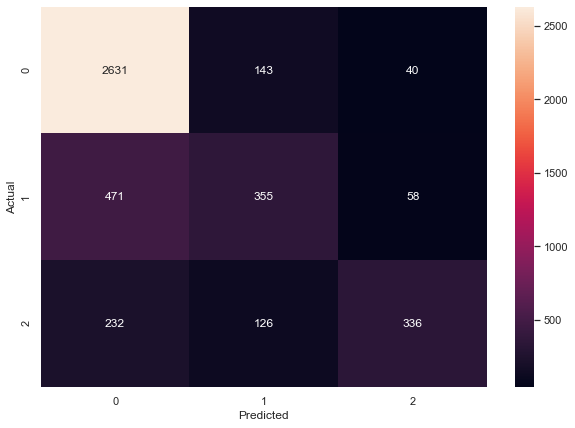

In [382]:
conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Sentiment analysis without target field using VADER

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [154]:
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,1
1,virginamerica plus add commercials experience tacky,2
2,virginamerica not today must mean need take another trip,1
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,0
4,virginamerica really big bad thing,0


In [155]:
sentiment = SentimentIntensityAnalyzer()
data['Sentiment'] = data['text'].apply(lambda x: sentiment.polarity_scores(x))

In [156]:
data.head()

,text,airline_sentiment,Sentiment
0,virginamerica dhepburn say,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,virginamerica plus add commercials experience tacky,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,virginamerica not today must mean need take another trip,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,0,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'compound': -0.3306}"
4,virginamerica really big bad thing,0,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.5829}"


In [157]:
data['Sentiment_Negative'] = data['Sentiment'].str['neg']
data['Sentiment_Neutral'] = data['Sentiment'].str['neu']
data['Sentiment_Positive'] = data['Sentiment'].str['pos']
data['Sentiment_Compound'] = data['Sentiment'].str['compound']

In [158]:
data.head()

,text,airline_sentiment,Sentiment,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive,Sentiment_Compound
0,virginamerica dhepburn say,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000
1,virginamerica plus add commercials experience tacky,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000
2,virginamerica not today must mean need take another trip,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,0,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'compound': -0.3306}",0.345,0.468,0.187,-0.3306
4,virginamerica really big bad thing,0,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.5829}",0.486,0.514,0.000,-0.5829


In [159]:
data.sort_values('Sentiment_Negative', ascending = False)

,text,airline_sentiment,Sentiment,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive,Sentiment_Compound
12626,americanair fuck suck,0,"{'neg': 0.865, 'neu': 0.135, 'pos': 0.0, 'compound': -0.7506}",0.865,0.135,0.000,-0.7506
563,unite rude rude,0,"{'neg': 0.857, 'neu': 0.143, 'pos': 0.0, 'compound': -0.7184}",0.857,0.143,0.000,-0.7184
914,unite inadequate accident,0,"{'neg': 0.853, 'neu': 0.147, 'pos': 0.0, 'compound': -0.7003}",0.853,0.147,0.000,-0.7003
672,unite frustrate nervous,0,"{'neg': 0.836, 'neu': 0.164, 'pos': 0.0, 'compound': -0.6249}",0.836,0.164,0.000,-0.6249
10920,usairways damn delay,0,"{'neg': 0.833, 'neu': 0.167, 'pos': 0.0, 'compound': -0.6124}",0.833,0.167,0.000,-0.6124
...,...,...,...,...,...,...,...
6388,southwestair big thank team family emerg day ticket experience excellent st time fly not last,2,"{'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.7351}",0.000,0.677,0.323,0.7351
6391,southwestair yes dale baggage office wonderful not everyone page hour wait,0,"{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.7506}",0.000,0.584,0.416,0.7506
6394,southwestair total win happy th bday intercom chocolate flight kiss chance hand snacksthank http tconklozcntto,2,"{'neg': 0.0, 'neu': 0.384, 'pos': 0.616, 'compound': 0.9439}",0.000,0.384,0.616,0.9439
6395,southwestair luggage still not find luggage not scan final destination way know,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000,1.000,0.000,0.0000


Summary:

- We used the Twitter dataset which has reviews in text format and their sentiments denoted across three categories (negative, neutral, and positive)
- The goal was to build a model for text-classification
- There were 14640 rows and 15 columns in the dataset
- There were 260526 words in the dataset before data pre-processing
- Majority of the airline tweets had a negative sentiment
- United has the maximum number of tweets followed by US Airways and American; Virgin America has the least number of tweets
- US Airways has the maximum number of negative sentiment tweets followed by American and Southwest 
  - United has the least number of negative sentiment tweets 
- Delta has the maximum number of positive tweets 
  - US Airways has the least number of positive tweets 
- Customer Service, Late Flight, Can't Tell and Cancelled Flight are the top 4 negative reasons in the dataset
- The data was pre-processed the data using variuos techniques and libraries
  - Removed html tags.
  - Removed http links 
  - Replaced contractions in string. (e.g. replace I'm --> I am) and so on.\
  - Removed numbers
  - Removed special characters and punctuations 
  - Converted text to lowercase 
  - Performed Tokenization
  - Removed Stopwords.
  - Lemmatized data
- There were 146219 words (down from 260526) after data pre-processing
- Vectorization was performed using CountVectorizer and TfidfVectorizer techniques
- Random Forest classification model was applied using both vectorizer methods
- After building the classification model, we predicted the result for the test data.
- The accuracy of the model was around 75% for both models. Tfidfvectorizer method had a slight better accuracy than countvectorizer
- However, we can still increase the accuracy of our model if we are able to get additional training data and better spread across all 3 sentiments. The dataset provided had only 14640 tweets and ~65% of them had negative sentiment.